# Bolidozor FITS CRVAL2 and SYSDATE1 plotter

For use of this notebook you must have mounted space.astro.cz storage server to local filesystem. It is possible to do with `sshfs`
```bash
  sshfs <user>@space.astro.cz /<mnt folder>
```
Then you must set path of `<mnt foler>` to `path` variable.

Script works only with files with `SYSDATE1` parameter in header.

In [153]:
import os
import datetime
import numpy
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.dates as md
%matplotlib inline  

In [183]:
paths = ['/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/']
times = numpy.ndarray((0,2))
start_time = datetime.datetime.now()
fits_browsed = 0
for path in paths:
    for root, dirs, files in os.walk(path):
        print("")
        print(root, " ")
        for name in files:
            if name.endswith(("snap.fits")):
                hdulist = fits.open(os.path.join(root, name))
                sysdate = hdulist[1].header['SYSDATE1']
                sysdate_beg = sysdate - hdulist[1].header['CDELT2']* hdulist[1].header['NAXIS2']
                crval = hdulist[1].header['CRVAL2']
                time = [sysdate_beg, crval]
                times = numpy.vstack( [times, time]  )
                hdulist.close()
                print("+", end='')
                fits_browsed += 1
times.sort(axis=0)
print("")
print("===================================")
print(fits_browsed, "was successfully processed")
print("It takes", datetime.datetime.now()-start_time)



/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/  

/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/11  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/08  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/02  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/05  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/16  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/20  
++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/20

# Plotter

Next cell plots a graph of time differences.

Positive number means SYSDATE is ahead of CRVAL2 (radio-observer time is late).<br/>
Negativ value means SYSDATE is behind CRVAL2 (radio-observer time is faster).

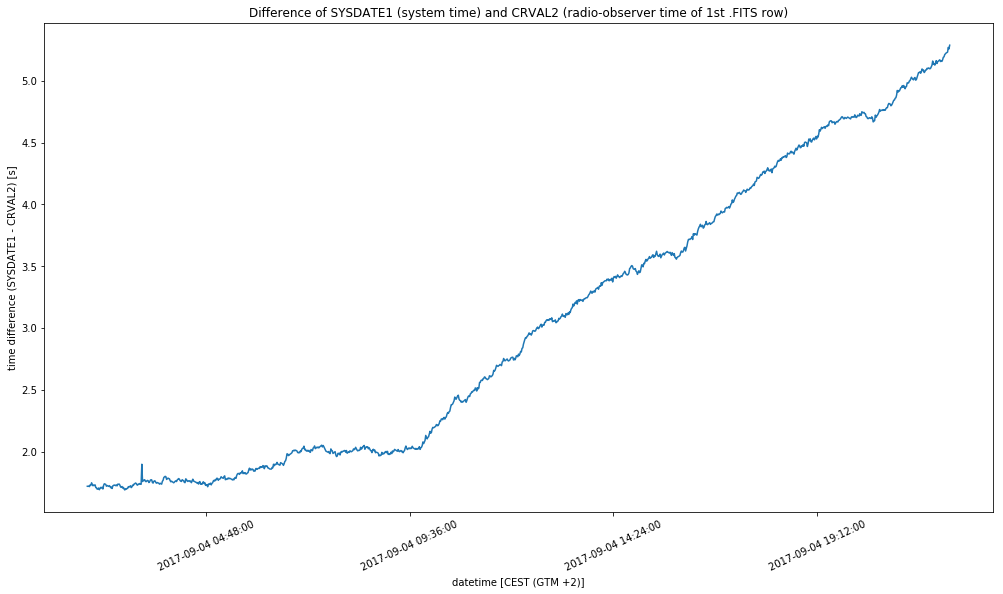

In [186]:
plt.figure(figsize=(17, 9))

data=md.date2num([datetime.datetime.fromtimestamp(ts) for ts in times[:,0]/1000])
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.set_title('Difference of SYSDATE1 (system time) and CRVAL2 (radio-observer time of 1st .FITS row)')
ax.set_xlabel('datetime [CEST (GTM +2)]')
ax.set_ylabel('time difference (SYSDATE1 - CRVAL2) [s]')

plt.plot(data, (times[:,0]-times[:,1])/1000.0)
plt.show()

<br>
# Calc time difference of one file

In [191]:
fits_path = '/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/19/20170904192530311_ZVPP-R6_snap.fits'

print("")
hdulist = fits.open(fits_path)
sysdate = hdulist[1].header['SYSDATE1']
sysdate_beg = sysdate - hdulist[1].header['CDELT2']* hdulist[1].header['NAXIS2']
crval = hdulist[1].header['CRVAL2']
hdulist.close()

time = (sysdate_beg - crval)/1000.0
if time>0:
    print("difference between times is", time, "s. (SYSDATE is ahead, radio-observer time is late)")
else:
    print("difference between times is", time, "s. (CRVAL2 is ahead, radio-observer time is in the future :-) )")


#difference between times is 5.028333251953125 s. (SYSDATE is ahead, radio-observer time is late)
